In [34]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras import Model, layers
from pathlib import Path
os.environ["KERAS_BACKEND"] = 'tensorflow'

In [2]:
test_results = pd.read_csv('data/results.csv')
test_results

/var/folders/f6/kpn2y4h53t569g316xl_gz580000gn/T/ipykernel_10790/1988100282.py:1: DtypeWarning: Columns (2,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  test_results = pd.read_csv('data/results.csv')


,Database Identifier,Database Name,Test Result UID,Sample Name,Sample Type,Receipt Time,Test Time,Post Time,Provider,cis-Nerolidol,...,THCV,CBN,CBD-A,CBD,CBDV,CBDV-A,delta-9 CBG-A,delta-9 CBG,CBC,Moisture Content
0,analytical360,Analytical 360,NaN,BHO Blackberry 22,Archived,NaN,NaN,2013-08-19,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN
1,analytical360,Analytical 360,NaN,BHO The Sour Bud,Archived,NaN,NaN,2013-08-19,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.75,0.34,NaN,NaN
2,analytical360,Analytical 360,NaN,Northern Lights,Archived,NaN,NaN,2013-08-19,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.66,0.05,NaN,NaN
3,analytical360,Analytical 360,NaN,Blueberry Kush,Archived,NaN,NaN,2013-08-19,3.0,NaN,...,NaN,0.04,NaN,NaN,NaN,NaN,0.25,0.19,NaN,NaN
4,analytical360,Analytical 360,NaN,White Dawg,Archived,NaN,NaN,2013-08-19,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.12,0.11,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43013,sclabs,SC Labs,NaN,Dream Tip THCa Primary,"Concentrate, Inhalable",2019-03-01,NaN,NaN,745.0,NaN,...,0.00,0.00,0.00,0.00,0.0,0.0,0.32,0.00,0.00,NaN
43014,sclabs,SC Labs,NaN,Cornbread Shatter Primary,"Concentrate, Inhalable",2019-03-01,NaN,NaN,745.0,NaN,...,0.00,0.00,0.16,0.00,0.0,0.0,3.11,0.26,0.00,NaN
43015,sclabs,SC Labs,NaN,Sample 1,"Flower, Inhalable",2019-03-13,NaN,NaN,747.0,NaN,...,0.00,0.00,0.02,0.00,0.0,0.0,0.33,0.11,0.00,NaN
43016,sclabs,SC Labs,NaN,Sample 4,"Flower, Inhalable",2019-03-13,NaN,NaN,747.0,NaN,...,0.00,0.00,0.04,0.00,0.0,0.0,0.69,0.12,0.00,NaN


In [3]:
test_results.columns

Index(['Database Identifier', 'Database Name', 'Test Result UID',
       'Sample Name', 'Sample Type', 'Receipt Time', 'Test Time', 'Post Time',
       'Provider', 'cis-Nerolidol', 'trans-Nerolidol', 'trans-Nerolidol 1',
       'trans-Nerolidol 2', 'trans-Ocimene', '3-Carene', 'Camphene',
       'Caryophyllene Oxide', 'Eucalyptol', 'Geraniol', 'Guaiol', 'Isopulegol',
       'Linalool', 'Ocimene', 'Terpinolene', 'alpha-Bisabolol',
       'alpha-Humulene', 'alpha-Pinene', 'alpha-Terpinene',
       'beta-Caryophyllene', 'beta-Myrcene', 'beta-Ocimene', 'beta-Pinene',
       'delta-Limonene', 'gamma-Terpinene', 'p-Cymene', 'delta-9 THC-A',
       'delta-9 THC', 'delta-8 THC', 'THC-A', 'THCV', 'CBN', 'CBD-A', 'CBD',
       'CBDV', 'CBDV-A', 'delta-9 CBG-A', 'delta-9 CBG', 'CBC',
       'Moisture Content'],
      dtype='object')

In [4]:
terpene_cols = ['cis-Nerolidol', 'trans-Nerolidol', 'trans-Nerolidol 1',
       'trans-Nerolidol 2', 'trans-Ocimene', '3-Carene', 'Camphene',
       'Caryophyllene Oxide', 'Eucalyptol', 'Geraniol', 'Guaiol', 'Isopulegol',
       'Linalool', 'Ocimene', 'Terpinolene', 'alpha-Bisabolol',
       'alpha-Humulene', 'alpha-Pinene', 'alpha-Terpinene',
       'beta-Caryophyllene', 'beta-Myrcene', 'beta-Ocimene', 'beta-Pinene',
       'delta-Limonene', 'gamma-Terpinene', 'p-Cymene',]
cannabinoid_cols = ['delta-9 THC-A', 'delta-9 THC', 'delta-8 THC', 'THC-A', 
                    'THCV', 'CBN', 'CBD-A', 'CBD', 'CBDV', 'CBDV-A', 
                    'delta-9 CBG-A', 'delta-9 CBG', 'CBC',]

In [5]:
valid_tests = test_results[terpene_cols].dropna(how='all', axis='index').dropna(how='all', axis='columns').copy()
valid_tests

,cis-Nerolidol,trans-Nerolidol,trans-Nerolidol 1,trans-Nerolidol 2,trans-Ocimene,3-Carene,Camphene,Caryophyllene Oxide,Eucalyptol,Geraniol,...,alpha-Humulene,alpha-Pinene,alpha-Terpinene,beta-Caryophyllene,beta-Myrcene,beta-Ocimene,beta-Pinene,delta-Limonene,gamma-Terpinene,p-Cymene
916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,...,7.420,0.020,NaN,0.530,0.000,NaN,0.000,0.000,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,...,9.960,0.330,NaN,0.430,0.230,NaN,0.000,0.000,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,...,1.710,0.000,NaN,0.360,1.900,NaN,0.000,0.000,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,...,6.730,0.470,NaN,1.240,0.520,NaN,0.000,0.000,NaN,NaN
999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,...,7.900,0.230,NaN,1.270,0.270,NaN,0.000,0.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43013,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000,0.0,0.0,...,0.125,0.000,0.0,0.291,0.153,NaN,0.000,0.000,0.0,0.0
43014,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.179,0.0,0.0,...,0.505,0.145,0.0,1.640,0.829,NaN,0.242,1.170,0.0,0.0
43015,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000,0.0,0.0,...,0.062,0.035,0.0,0.197,0.408,NaN,0.070,0.404,0.0,0.0
43016,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000,0.0,0.0,...,0.085,0.045,0.0,0.307,0.028,NaN,0.085,0.390,0.0,0.0


In [6]:
test_results['Sample Name'].value_counts()

Sample Name
Blue Dream                   425
Dutch Treat                  273
Harlequin                    188
Girl Scout Cookies           166
Super Lemon Haze             137
                            ... 
The Neighbor’s Sample          1
Sage & Sour 2                  1
RSO T+K 11-12-14               1
RSO T+K 11-16-14               1
Cornbread Shatter Primary      1
Name: count, Length: 27694, dtype: int64

In [7]:
test_results.isnull().sum()

Database Identifier        0
Database Name              0
Test Result UID        39677
Sample Name                0
Sample Type             1105
Receipt Time           34266
Test Time              39831
Post Time               8906
Provider                8621
cis-Nerolidol          41778
trans-Nerolidol        41778
trans-Nerolidol 1      40930
trans-Nerolidol 2      40930
trans-Ocimene          43017
3-Carene               34125
Camphene               34125
Caryophyllene Oxide    10356
Eucalyptol             34125
Geraniol               34125
Guaiol                 34125
Isopulegol             34125
Linalool                9523
Ocimene                33242
Terpinolene             9475
alpha-Bisabolol        34126
alpha-Humulene          9475
alpha-Pinene            9474
alpha-Terpinene        34124
beta-Caryophyllene      9474
beta-Myrcene            9473
beta-Ocimene           39691
beta-Pinene             9473
delta-Limonene          9474
gamma-Terpinene        34125
p-Cymene      

In [8]:
leafly = pd.read_csv('data/leafly_strain_data.csv')
leafly

,name,img_url,type,thc_level,most_common_terpene,description,relaxed,happy,euphoric,uplifted,...,fibromyalgia,crohn's_disease,phantom_limb_pain,epilepsy,multiple_sclerosis,parkinson's,tourette's_syndrome,alzheimer's,hiv/aids,tinnitus
0,GG4,https://images.leafly.com/flower-images/gg-4.jpg,Hybrid,20%,Caryophyllene,"Original Glue (GG4), developed by GG Strains, ...",66%,54%,51%,39%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
1,Wedding Cake,https://images.leafly.com/flower-images/weddin...,Hybrid,22%,Limonene,Wedding Cake is a potent indica-hybrid marijua...,60%,50%,41%,35%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
2,Runtz,https://images.leafly.com/flower-images/runtz-...,Hybrid,19%,Limonene,Runtz is a rare hybrid marijuana strain by Coo...,47%,62%,48%,43%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
3,Gelato,https://images.leafly.com/flower-images/gelato...,Hybrid,17%,Caryophyllene,"Gelato, aka Larry Bird, is a hybrid marijuana ...",54%,49%,46%,37%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
4,Blue Dream,https://images.leafly.com/flower-images/blue-d...,Hybrid,18%,Myrcene,Blue Dream is a sativa-dominant hybrid marijua...,48%,57%,52%,48%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4757,Khyber Kush,NaN,Hybrid,25%,Myrcene,An ode to the Khyber Pass that bridges Pakista...,0%,0%,0%,0%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
4758,Dorit,NaN,Indica,NaN,NaN,Dorit is a 70/30 indica-dominant strain tailor...,83%,0%,66%,33%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
4759,Berry Noir,NaN,Indica,NaN,NaN,Berry Noir is an indica strain that competed i...,66%,0%,50%,16%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
4760,South Central LA,NaN,Indica,NaN,NaN,South Central LA is a high-THC indica strain f...,75%,0%,75%,75%,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%


In [9]:
leafly.columns

Index(['name', 'img_url', 'type', 'thc_level', 'most_common_terpene',
       'description', 'relaxed', 'happy', 'euphoric', 'uplifted', 'sleepy',
       'dry_mouth', 'dry_eyes', 'dizzy', 'paranoid', 'anxious', 'stress',
       'pain', 'depression', 'anxiety', 'insomnia', 'hungry', 'talkative',
       'headache', 'ptsd', 'creative', 'energetic', 'fatigue', 'focused',
       'giggly', 'lack_of_appetite', 'nausea', 'headaches', 'bipolar_disorder',
       'cancer', 'tingly', 'cramps', 'aroused', 'gastrointestinal_disorder',
       'inflammation', 'muscle_spasms', 'eye_pressure', 'migraines', 'asthma',
       'anorexia', 'arthritis', 'add/adhd', 'muscular_dystrophy',
       'hypertension', 'glaucoma', 'pms', 'seizures', 'spasticity',
       'spinal_cord_injury', 'fibromyalgia', 'crohn's_disease',
       'phantom_limb_pain', 'epilepsy', 'multiple_sclerosis', 'parkinson's',
       'tourette's_syndrome', 'alzheimer's', 'hiv/aids', 'tinnitus'],
      dtype='object')

In [10]:
leafly['description'][1]

'Wedding Cake is a potent indica-hybrid marijuana strain made by crossing Cherry Pie with Girl Scout Cookies. Wedding Cake provides relaxing and euphoric effects that calm the body and mind. This strain features a rich and tangy flavor profile with undertones of earthy pepper. Medical marijuana patients choose Wedding Cake to help relieve symptoms associated with pain, insomnia and appetite loss. Consumers with a low THC tolerance should enjoy this strain with an extra slice of care due to its high THC content. Wedding Cake has soared in popularity over the years and was named Leafly Strain of the Year in 2019. Fun fact: In Canada, this strain is known as Pink Cookies.'

In [11]:
test_results[(test_results['Sample Name'].isin(leafly['name']))]['Sample Name'].value_counts()

Sample Name
Blue Dream          425
Dutch Treat         273
Harlequin           188
Super Lemon Haze    137
Sour Diesel         137
                   ... 
Bacio Gelato          1
Quin-N-Tonic          1
Krakatoa              1
Armageddon            1
Pacific Frost         1
Name: count, Length: 1199, dtype: int64

In [12]:
test_results[(test_results['Sample Name'].isin(leafly['name'])) & (test_results['Database Identifier']!='analytical360')]['Sample Name'].value_counts()

Sample Name
Blue Dream              46
Sour Diesel             38
Super Lemon Haze        19
Tangie                  18
Fire OG                 18
                        ..
California Gold          1
Double Tangie Banana     1
Chem Scout               1
White Dream              1
Pacific Frost            1
Name: count, Length: 552, dtype: int64

In [13]:
df = test_results.loc[valid_tests.index,['Sample Name']+terpene_cols+cannabinoid_cols]
df

,Sample Name,cis-Nerolidol,trans-Nerolidol,trans-Nerolidol 1,trans-Nerolidol 2,trans-Ocimene,3-Carene,Camphene,Caryophyllene Oxide,Eucalyptol,...,THC-A,THCV,CBN,CBD-A,CBD,CBDV,CBDV-A,delta-9 CBG-A,delta-9 CBG,CBC
916,LA Confidential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,0.14,0.16,NaN,NaN,0.32,0.16,0.02
996,Sour Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,0.15,0.19,NaN,NaN,0.35,NaN,0.02
997,MTF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,0.15,0.04,NaN,NaN,0.82,NaN,0.03
998,Cesar's Salad Girl Scout Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,0.14,0.07,NaN,NaN,0.51,NaN,0.03
999,True Girl Scout Cookies (Only The Best),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,0.14,0.06,NaN,NaN,0.81,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43013,Dream Tip THCa Primary,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000,0.0,...,96.02,0.00,0.00,0.00,0.00,0.0,0.0,0.32,0.00,0.00
43014,Cornbread Shatter Primary,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.179,0.0,...,71.37,0.00,0.00,0.16,0.00,0.0,0.0,3.11,0.26,0.00
43015,Sample 1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000,0.0,...,15.62,0.00,0.00,0.02,0.00,0.0,0.0,0.33,0.11,0.00
43016,Sample 4,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000,0.0,...,25.57,0.00,0.00,0.04,0.00,0.0,0.0,0.69,0.12,0.00


In [14]:
df = df.fillna(0.000)
df

,Sample Name,cis-Nerolidol,trans-Nerolidol,trans-Nerolidol 1,trans-Nerolidol 2,trans-Ocimene,3-Carene,Camphene,Caryophyllene Oxide,Eucalyptol,...,THC-A,THCV,CBN,CBD-A,CBD,CBDV,CBDV-A,delta-9 CBG-A,delta-9 CBG,CBC
916,LA Confidential,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.00,0.00,0.00,0.14,0.16,0.0,0.0,0.32,0.16,0.02
996,Sour Diesel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.00,0.00,0.00,0.15,0.19,0.0,0.0,0.35,0.00,0.02
997,MTF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.00,0.00,0.00,0.15,0.04,0.0,0.0,0.82,0.00,0.03
998,Cesar's Salad Girl Scout Cookies,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.00,0.00,0.00,0.14,0.07,0.0,0.0,0.51,0.00,0.03
999,True Girl Scout Cookies (Only The Best),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.00,0.00,0.00,0.14,0.06,0.0,0.0,0.81,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43013,Dream Tip THCa Primary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,96.02,0.00,0.00,0.00,0.00,0.0,0.0,0.32,0.00,0.00
43014,Cornbread Shatter Primary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179,0.0,...,71.37,0.00,0.00,0.16,0.00,0.0,0.0,3.11,0.26,0.00
43015,Sample 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,15.62,0.00,0.00,0.02,0.00,0.0,0.0,0.33,0.11,0.00
43016,Sample 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,25.57,0.00,0.00,0.04,0.00,0.0,0.0,0.69,0.12,0.00


In [15]:
strains = df[df['Sample Name'].isin(leafly['name'])].groupby('Sample Name').agg('mean')
strains

,cis-Nerolidol,trans-Nerolidol,trans-Nerolidol 1,trans-Nerolidol 2,trans-Ocimene,3-Carene,Camphene,Caryophyllene Oxide,Eucalyptol,Geraniol,...,THC-A,THCV,CBN,CBD-A,CBD,CBDV,CBDV-A,delta-9 CBG-A,delta-9 CBG,CBC
Sample Name,,,,,,,,,,,,,,,,,,,,,
22,0.0,0.0,0.0,0.0,0.0,0.00,0.040000,0.000000,0.000,0.000000,...,80.730000,0.010000,0.590000,0.010,0.010000,0.0,0.000000,3.070000,0.390000,0.150000
24k Gold,0.0,0.0,0.0,0.0,0.0,0.00,0.011000,0.003000,0.000,0.001000,...,24.350000,0.000000,0.000000,0.090,0.000000,0.0,0.000000,0.500000,0.180000,0.000000
3 Kings,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.533333,0.000,0.000000,...,3.420000,0.000000,0.020000,0.120,0.156667,0.0,0.000000,0.416667,0.011667,0.120000
3X Crazy,0.0,0.0,0.0,0.0,0.0,0.00,0.003000,0.004000,0.000,0.002000,...,13.620000,0.000000,0.000000,0.050,0.000000,0.0,0.000000,0.170000,0.050000,0.000000
501st OG,0.0,0.0,0.0,0.0,0.0,0.00,0.006636,0.057818,0.000,0.000909,...,14.760909,0.002727,0.047273,0.110,0.043636,0.0,0.001818,0.872727,0.051818,0.032727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zelly’s Gift,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.000,0.000000,...,0.000000,0.000000,0.190000,0.060,0.050000,0.0,0.000000,0.000000,0.330000,0.000000
Zeus OG,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.070,0.100000,0.0,0.000000,0.210000,0.000000,0.040000
Zkittlez,0.0,0.0,0.0,0.0,0.0,0.00,0.010000,0.134000,0.001,0.011500,...,12.720000,0.065000,0.370000,0.065,0.000000,0.0,0.000000,0.720000,0.460000,0.355000


In [16]:
strains.index

Index(['22', '24k Gold', '3 Kings', '3X Crazy', '501st OG', '707',
       '707 Truthband', '8 Ball Kush', '818 Headband', '818 OG',
       ...
       'Yeti OG', 'Yoda OG', 'Yogi Diesel', 'Zamaldelica', 'Zelda',
       'Zelly’s Gift', 'Zeus OG', 'Zkittlez', 'Zookies', 'Zprite'],
      dtype='object', name='Sample Name', length=1111)

In [17]:
joined_data = strains.join(leafly.set_index('name'))
joined_data

,cis-Nerolidol,trans-Nerolidol,trans-Nerolidol 1,trans-Nerolidol 2,trans-Ocimene,3-Carene,Camphene,Caryophyllene Oxide,Eucalyptol,Geraniol,...,fibromyalgia,crohn's_disease,phantom_limb_pain,epilepsy,multiple_sclerosis,parkinson's,tourette's_syndrome,alzheimer's,hiv/aids,tinnitus
Sample Name,,,,,,,,,,,,,,,,,,,,,
22,0.0,0.0,0.0,0.0,0.0,0.00,0.040000,0.000000,0.000,0.000000,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
24k Gold,0.0,0.0,0.0,0.0,0.0,0.00,0.011000,0.003000,0.000,0.001000,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
3 Kings,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.533333,0.000,0.000000,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
3X Crazy,0.0,0.0,0.0,0.0,0.0,0.00,0.003000,0.004000,0.000,0.002000,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
501st OG,0.0,0.0,0.0,0.0,0.0,0.00,0.006636,0.057818,0.000,0.000909,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zelly’s Gift,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.000,0.000000,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
Zeus OG,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.000,0.000000,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
Zkittlez,0.0,0.0,0.0,0.0,0.0,0.00,0.010000,0.134000,0.001,0.011500,...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%


In [18]:
joined_data.columns.to_list()

['cis-Nerolidol',
 'trans-Nerolidol',
 'trans-Nerolidol 1',
 'trans-Nerolidol 2',
 'trans-Ocimene',
 '3-Carene',
 'Camphene',
 'Caryophyllene Oxide',
 'Eucalyptol',
 'Geraniol',
 'Guaiol',
 'Isopulegol',
 'Linalool',
 'Ocimene',
 'Terpinolene',
 'alpha-Bisabolol',
 'alpha-Humulene',
 'alpha-Pinene',
 'alpha-Terpinene',
 'beta-Caryophyllene',
 'beta-Myrcene',
 'beta-Ocimene',
 'beta-Pinene',
 'delta-Limonene',
 'gamma-Terpinene',
 'p-Cymene',
 'delta-9 THC-A',
 'delta-9 THC',
 'delta-8 THC',
 'THC-A',
 'THCV',
 'CBN',
 'CBD-A',
 'CBD',
 'CBDV',
 'CBDV-A',
 'delta-9 CBG-A',
 'delta-9 CBG',
 'CBC',
 'img_url',
 'type',
 'thc_level',
 'most_common_terpene',
 'description',
 'relaxed',
 'happy',
 'euphoric',
 'uplifted',
 'sleepy',
 'dry_mouth',
 'dry_eyes',
 'dizzy',
 'paranoid',
 'anxious',
 'stress',
 'pain',
 'depression',
 'anxiety',
 'insomnia',
 'hungry',
 'talkative',
 'headache',
 'ptsd',
 'creative',
 'energetic',
 'fatigue',
 'focused',
 'giggly',
 'lack_of_appetite',
 'nausea',


In [19]:
joined_data.dtypes.to_dict()

{'cis-Nerolidol': dtype('float64'),
 'trans-Nerolidol': dtype('float64'),
 'trans-Nerolidol 1': dtype('float64'),
 'trans-Nerolidol 2': dtype('float64'),
 'trans-Ocimene': dtype('float64'),
 '3-Carene': dtype('float64'),
 'Camphene': dtype('float64'),
 'Caryophyllene Oxide': dtype('float64'),
 'Eucalyptol': dtype('float64'),
 'Geraniol': dtype('float64'),
 'Guaiol': dtype('float64'),
 'Isopulegol': dtype('float64'),
 'Linalool': dtype('float64'),
 'Ocimene': dtype('float64'),
 'Terpinolene': dtype('float64'),
 'alpha-Bisabolol': dtype('float64'),
 'alpha-Humulene': dtype('float64'),
 'alpha-Pinene': dtype('float64'),
 'alpha-Terpinene': dtype('float64'),
 'beta-Caryophyllene': dtype('float64'),
 'beta-Myrcene': dtype('float64'),
 'beta-Ocimene': dtype('float64'),
 'beta-Pinene': dtype('float64'),
 'delta-Limonene': dtype('float64'),
 'gamma-Terpinene': dtype('float64'),
 'p-Cymene': dtype('float64'),
 'delta-9 THC-A': dtype('float64'),
 'delta-9 THC': dtype('float64'),
 'delta-8 THC': 

In [20]:
joined_data['relaxed'].str.replace('%','').astype('float').apply(lambda x:x/100)

Sample Name
22              0.00
24k Gold        0.61
3 Kings         0.58
3X Crazy        0.76
501st OG        0.81
                ... 
Zelly’s Gift    0.48
Zeus OG         0.66
Zkittlez        0.54
Zookies         0.69
Zprite          0.00
Name: relaxed, Length: 1111, dtype: float64

In [21]:
predictors = ['cis-Nerolidol',
 'trans-Nerolidol',
 'trans-Nerolidol 1',
 'trans-Nerolidol 2',
 'trans-Ocimene',
 '3-Carene',
 'Camphene',
 'Caryophyllene Oxide',
 'Eucalyptol',
 'Geraniol',
 'Guaiol',
 'Isopulegol',
 'Linalool',
 'Ocimene',
 'Terpinolene',
 'alpha-Bisabolol',
 'alpha-Humulene',
 'alpha-Pinene',
 'alpha-Terpinene',
 'beta-Caryophyllene',
 'beta-Myrcene',
 'beta-Ocimene',
 'beta-Pinene',
 'delta-Limonene',
 'gamma-Terpinene',
 'p-Cymene',
 'delta-9 THC-A',
 'delta-9 THC',
 'delta-8 THC',
 'THC-A',
 'THCV',
 'CBN',
 'CBD-A',
 'CBD',
 'CBDV',
 'CBDV-A',
 'delta-9 CBG-A',
 'delta-9 CBG',
 'CBC',
]
effects = ['relaxed',
 'happy',
 'euphoric',
 'uplifted',
 'sleepy',
 'dry_mouth',
 'dry_eyes',
 'dizzy',
 'paranoid',
 'anxious',
 'hungry',
 'talkative',
 'creative',
 'energetic',
 'focused',
 'giggly',
 'tingly',
 'aroused',]
illnesses = [ 
 'stress',
 'pain',
 'depression',
 'anxiety',
 'insomnia',
 'headache',
 'ptsd',
 'fatigue',
 'lack_of_appetite',
 'nausea',
 'headaches',
 'bipolar_disorder',
 'cancer',
 'cramps',
 'gastrointestinal_disorder',
 'inflammation',
 'muscle_spasms',
 'eye_pressure',
 'migraines',
 'asthma',
 'anorexia',
 'arthritis',
 'add/adhd',
 'muscular_dystrophy',
 'hypertension',
 'glaucoma',
 'pms',
 'seizures',
 'spasticity',
 'spinal_cord_injury',
 'fibromyalgia',
 "crohn's_disease",
 'phantom_limb_pain',
 'epilepsy',
 'multiple_sclerosis',
 "parkinson's",
 "tourette's_syndrome",
 "alzheimer's",
 'hiv/aids',
 'tinnitus']

In [22]:
joined_data[effects+illnesses]=joined_data[effects+illnesses].apply(lambda x: [float(y.replace('%',''))/100.0 for y in x])
joined_data

,cis-Nerolidol,trans-Nerolidol,trans-Nerolidol 1,trans-Nerolidol 2,trans-Ocimene,3-Carene,Camphene,Caryophyllene Oxide,Eucalyptol,Geraniol,...,fibromyalgia,crohn's_disease,phantom_limb_pain,epilepsy,multiple_sclerosis,parkinson's,tourette's_syndrome,alzheimer's,hiv/aids,tinnitus
Sample Name,,,,,,,,,,,,,,,,,,,,,
22,0.0,0.0,0.0,0.0,0.0,0.00,0.040000,0.000000,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24k Gold,0.0,0.0,0.0,0.0,0.0,0.00,0.011000,0.003000,0.000,0.001000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3 Kings,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.533333,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3X Crazy,0.0,0.0,0.0,0.0,0.0,0.00,0.003000,0.004000,0.000,0.002000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501st OG,0.0,0.0,0.0,0.0,0.0,0.00,0.006636,0.057818,0.000,0.000909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zelly’s Gift,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zeus OG,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zkittlez,0.0,0.0,0.0,0.0,0.0,0.00,0.010000,0.134000,0.001,0.011500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
joined_data['type'].value_counts(dropna=False)

type
Hybrid    640
Indica    285
Sativa    168
NaN        18
Name: count, dtype: int64

In [48]:
joined_data[joined_data['type'].isna()]['type']

Sample Name
Animal OG                NaN
Cheesecake               NaN
Dragon Lady              NaN
Green Marvel             NaN
Jack Straw               NaN
Lemon Punch              NaN
Lychee                   NaN
M4                       NaN
Melon Cookies            NaN
Mendo Purple             NaN
Petroleum Nightmare      NaN
Purgatory                NaN
Silver Fox               NaN
Sour Walker              NaN
Spirit In The Sky        NaN
Strawberry Trainwreck    NaN
Tigers Blood             NaN
Zprite                   NaN
Name: type, dtype: object

In [24]:
joined_data.dtypes.to_dict()

{'cis-Nerolidol': dtype('float64'),
 'trans-Nerolidol': dtype('float64'),
 'trans-Nerolidol 1': dtype('float64'),
 'trans-Nerolidol 2': dtype('float64'),
 'trans-Ocimene': dtype('float64'),
 '3-Carene': dtype('float64'),
 'Camphene': dtype('float64'),
 'Caryophyllene Oxide': dtype('float64'),
 'Eucalyptol': dtype('float64'),
 'Geraniol': dtype('float64'),
 'Guaiol': dtype('float64'),
 'Isopulegol': dtype('float64'),
 'Linalool': dtype('float64'),
 'Ocimene': dtype('float64'),
 'Terpinolene': dtype('float64'),
 'alpha-Bisabolol': dtype('float64'),
 'alpha-Humulene': dtype('float64'),
 'alpha-Pinene': dtype('float64'),
 'alpha-Terpinene': dtype('float64'),
 'beta-Caryophyllene': dtype('float64'),
 'beta-Myrcene': dtype('float64'),
 'beta-Ocimene': dtype('float64'),
 'beta-Pinene': dtype('float64'),
 'delta-Limonene': dtype('float64'),
 'gamma-Terpinene': dtype('float64'),
 'p-Cymene': dtype('float64'),
 'delta-9 THC-A': dtype('float64'),
 'delta-9 THC': dtype('float64'),
 'delta-8 THC': 

In [50]:
joined_data.to_csv('data/cleaned_joined_data.csv')

In [25]:
X = joined_data[predictors]
y_effects = joined_data[effects]
y_illnesses = joined_data[illnesses]

In [26]:
X.shape, y_effects.shape, y_illnesses.shape

((1111, 39), (1111, 18), (1111, 40))

In [27]:
# create nn with terpenes and cannabinoids as input
# output 1: predicted effects
# output 2: predicted illnesses ameliorated

In [28]:
X_train, X_test, y_effects_train, y_effects_test, y_illnesses_train, y_illnesses_test = train_test_split(X, y_effects, y_illnesses)

In [29]:
X_train.shape, X_test.shape

((833, 39), (278, 39))

In [30]:
np.array(X_train)

array([[0.        , 0.        , 0.        , ..., 0.48      , 0.02      ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.805     , 0.075     ,
        0.06      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.51      ,
        0.06      ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.09      , 0.18      ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.68090909, 0.02090909,
        0.03818182],
       [0.        , 0.        , 0.        , ..., 4.31      , 0.16      ,
        0.01      ]])

In [31]:
np.array(y_effects_train)

array([[0.38, 0.48, 0.34, ..., 0.  , 0.  , 0.  ],
       [0.7 , 0.46, 0.48, ..., 0.  , 0.  , 0.  ],
       [0.37, 0.53, 0.5 , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.62, 0.54, 0.5 , ..., 0.  , 0.  , 0.  ],
       [0.44, 0.55, 0.38, ..., 0.  , 0.  , 0.  ],
       [0.44, 0.68, 0.5 , ..., 0.  , 0.  , 0.  ]])

In [32]:
# scaler_X = StandardScaler()
# X_train_scaled = scaler_X.fit_transform(X_train)
# X_test_scaled = scaler_X.transform(X_test)


# # scale effects
# scaler_effects = StandardScaler()
# y_effects_train_scaled = scaler_effects.fit_transform(y_effects_train)
# y_effects_test_scaled = scaler_effects.transform(y_effects_test)

# # scale illnesses
# scaler_illnesses = StandardScaler()
# y_illnesses_train_scaled = scaler_illnesses.fit_transform(y_illnesses_train)
# y_illnesses_test_scaled = scaler_illnesses.transform(y_illnesses_test)

In [33]:
# input layer
input_layer = layers.Input(shape=(X_train.shape[1],), name='input_features')

# shared layers
shared_layer_1 = layers.Dense(64, activation='relu')(input_layer)
shared_layer_2 = layers.Dense(32, activation='relu')(shared_layer_1)

In [34]:
effects_hidden_layer = layers.Dense(16, activation='relu')(shared_layer_2)

effects_output = layers.Dense(y_effects_train.shape[1], activation='softmax', name='effects_output')(effects_hidden_layer)

In [35]:
illnesses_hidden_layer = layers.Dense(16, activation='relu')(shared_layer_2)

illnesses_output = layers.Dense(y_illnesses_train.shape[1], activation='softmax', name='illnesses_output')(illnesses_hidden_layer)

In [64]:
model = Model(inputs=input_layer, outputs={'effects_output':effects_output, 'illnesses_output':illnesses_output})

model.compile(
    optimizer='adam',
    loss={
        'effects_output':'binary_crossentropy',
        'illnesses_output':'binary_crossentropy'
    },
    metrics={
        'effects_output':'accuracy',
        'illnesses_output':'accuracy'
    }
)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_features      │ (None, 39)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      2,560 │ input_features[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      2,080 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 16)        │        528 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 16)        │        528 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ effects_output      │ (None, 18)        │        306 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ illnesses_output    │ (None, 40)        │        680 │ dense_3[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,682 (26.10 KB)

 Trainable params: 6,682 (26.10 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
fit_model = model.fit(
    X_train,
    {
        'effects_output':np.array(y_effects_train),
        'illnesses_output':np.array(y_illnesses_train)
    },
    epochs=100,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - effects_output_accuracy: 0.0644 - effects_output_loss: 624.5206 - illnesses_output_accuracy: 0.0176 - illnesses_output_loss: 108.4087 - loss: 733.9624 - val_effects_output_accuracy: 0.5329 - val_effects_output_loss: 448.4413 - val_illnesses_output_accuracy: 0.7545 - val_illnesses_output_loss: 66.1949 - val_loss: 518.8683
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - effects_output_accuracy: 0.4099 - effects_output_loss: 424.7085 - illnesses_output_accuracy: 0.3473 - illnesses_output_loss: 76.7894 - loss: 500.0679 - val_effects_output_accuracy: 0.5329 - val_effects_output_loss: 429.0406 - val_illnesses_output_accuracy: 0.0000e+00 - val_illnesses_output_loss: 84.9748 - val_loss: 522.3667
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - effects_output_accuracy: 0.3949 - effects_output_loss: 390.7240 - illnesses_output_accuracy: 0.2880 - illnesses_output_loss: 77.8017 - loss: 469.1995 - val_effects_output_accuracy: 0.5329 - v

In [66]:
model_test_results = model.evaluate(np.array(X_test), {'effects_output':np.array(y_effects_test), 'illnesses_output':np.array(y_illnesses_test)})
model_test_results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - effects_output_accuracy: 0.5820 - effects_output_loss: 73.4279 - illnesses_output_accuracy: 0.7109 - illnesses_output_loss: 13.8305 - loss: 87.3383  


[82.21831512451172,
 68.4188232421875,
 13.400057792663574,
 0.564748227596283,
 0.7266187071800232]

<Axes: >

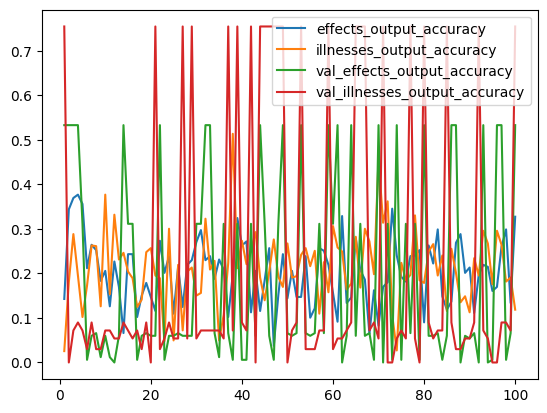

In [67]:
model_history = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history['loss'])+1))
model_history.plot(y=['effects_output_accuracy','illnesses_output_accuracy','val_effects_output_accuracy','val_illnesses_output_accuracy',])

In [68]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_effects_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=128,
        step=2), activation=activation, input_dim=len(X.columns)))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 16)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=128,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=18, activation="softmax"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [71]:
# Import the kerastuner library


tuner_effects = kt.Hyperband(
    create_effects_model,
    objective="val_accuracy",
    max_epochs=100,
    hyperband_iterations=2)

In [72]:
# Run the kerastuner search for best hyperparameters
tuner_effects.search(X_train,y_effects_train,epochs=20,validation_data=(X_test,y_effects_test))

Trial 504 Complete [00h 00m 11s]
val_accuracy: 0.568345308303833

Best val_accuracy So Far: 0.5755395889282227
Total elapsed time: 00h 42m 52s


In [73]:
# Get best model hyperparameters
best_hyper_effects = tuner_effects.get_best_hyperparameters(1)[0]
best_hyper_effects.values

{'activation': 'tanh',
 'first_units': 81,
 'num_layers': 2,
 'units_0': 113,
 'units_1': 101,
 'units_2': 37,
 'units_3': 123,
 'units_4': 101,
 'units_5': 11,
 'units_6': 109,
 'units_7': 103,
 'units_8': 3,
 'units_9': 13,
 'units_10': 53,
 'units_11': 119,
 'units_12': 73,
 'units_13': 87,
 'units_14': 13,
 'units_15': 77,
 'tuner/epochs': 34,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [74]:
# Evaluate best model against full test data
best_model = tuner_effects.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test,y_effects_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

9/9 - 0s - 9ms/step - accuracy: 0.5755 - loss: 0.3228
Loss: 0.3227693438529968, Accuracy: 0.5755395889282227


/Users/justified/.pyenv/versions/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/justified/.pyenv/versions/3.12.1/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [84]:
file_path_effects = Path('effects-tuner-best-model.keras')
best_model.save(file_path_effects)

In [35]:
# illnesses model
# Create a method that creates a new Sequential model with hyperparameter options
def create_illnesses_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=128,
        step=2), activation=activation, input_dim=len(X.columns)))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 16)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=128,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=40, activation="softmax"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [42]:
tuner_effects_illnesses = kt.Hyperband(
    create_illnesses_model,
    objective="val_accuracy",
    max_epochs=100,
    hyperband_iterations=2,
    overwrite=True)

/Users/justified/.pyenv/versions/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# Run the kerastuner search for best hyperparameters
tuner_effects_illnesses.search(X_train,y_illnesses_train,epochs=20,validation_data=(X_test,y_illnesses_test))

Trial 505 Complete [00h 00m 16s]
val_accuracy: 0.7086330652236938

Best val_accuracy So Far: 0.7158273458480835
Total elapsed time: 01h 01m 22s


In [45]:
# Get best model hyperparameters
best_hyper_illnesses = tuner_effects_illnesses.get_best_hyperparameters(1)[0]
best_hyper_illnesses.values

{'activation': 'relu',
 'first_units': 55,
 'num_layers': 4,
 'units_0': 53,
 'units_1': 49,
 'units_2': 49,
 'units_3': 51,
 'units_4': 113,
 'units_5': 13,
 'units_6': 43,
 'units_7': 119,
 'units_8': 105,
 'units_9': 109,
 'units_10': 107,
 'units_11': 65,
 'units_12': 101,
 'units_13': 117,
 'units_14': 43,
 'units_15': 3,
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 3,
 'tuner/round': 3,
 'tuner/trial_id': '0204'}

In [44]:
best_model_illnesses = tuner_effects_illnesses.get_best_models(1)[0]
model_loss_ill, model_accuracy_ill = best_model_illnesses.evaluate(X_test,y_illnesses_test,verbose=2)
print(f"Loss: {model_loss_ill}, Accuracy: {model_accuracy_ill}")

9/9 - 0s - 11ms/step - accuracy: 0.7158 - loss: 0.0924
Loss: 0.09244902431964874, Accuracy: 0.7158273458480835


/Users/justified/.pyenv/versions/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/justified/.pyenv/versions/3.12.1/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [49]:
file_path_illnesses = Path('illnesses-tuner-best-model.keras')
best_model_illnesses.save(file_path_illnesses)

In [40]:
# model_2 = Model(inputs=input_layer, outputs={'effects_output':effects_output, 'illnesses_output':illnesses_output})

# model_2.compile(
#     optimizer='adam',
#     loss={
#         'effects_output':'categorical_crossentropy',
#         'illnesses_output':'categorical_crossentropy'
#     },
#     metrics={
#         'effects_output':'accuracy',
#         'illnesses_output':'accuracy'
#     }
# )
# model_2.summary()

In [41]:
# y_effects_train_scaled

In [42]:
# fit_model_2 = model_2.fit(
#     X_train_scaled,
#     {
#         'effects_output':y_effects_train_scaled,
#         'illnesses_output':y_illnesses_train
#     },
#     epochs=100,
#     batch_size=64,
#     validation_split=0.2
# )

In [43]:
# pd.DataFrame(fit_model_2.history, index=range(1,len(fit_model_2.history['loss'])+1)).plot()

In [44]:
# model_3 = Model(inputs=input_layer, outputs={'effects_output':effects_output, 'illnesses_output':illnesses_output})

# model_3.compile(
#     optimizer='adam',
#     loss={
#         'effects_output':'categorical_crossentropy',
#         'illnesses_output':'categorical_crossentropy'
#     },
#     metrics={
#         'effects_output':'accuracy',
#         'illnesses_output':'accuracy'
#     }
# )
# model_3.summary()

In [45]:
# input from user
# prompt llm to associate with data/terpenes
# map back to model and/or recommendation